In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the result sets
df = pd.read_csv("./results/bert_result_new_model_weights_6_epochs.csv")
df_del_hashtag = pd.read_csv("./results/bert_result_new_model_weights_6_epochs_del_hashtag.csv")
df_hashtags_removed = pd.read_csv("./results/bert_result_new_model_weights_6_epochs_hashtags_removed.csv")

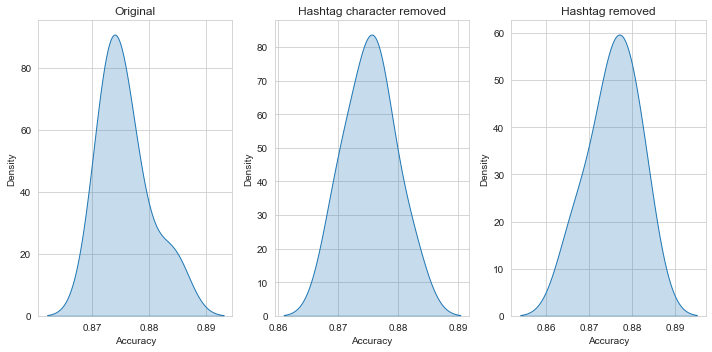

In [3]:
fig, ax = plt.subplots(1,3,figsize=(10, 5))
sns.kdeplot(df["Accuracy"], fill=True, ax=ax[0]).set(title='Original')
sns.kdeplot(df_del_hashtag["Accuracy"], fill=True, ax=ax[1]).set(title='Hashtag character removed')
sns.kdeplot(df_hashtags_removed["Accuracy"], fill=True, ax=ax[2]).set(title='Hashtag removed')
fig.tight_layout()
#fig.suptitle('Accuracy density')
plt.show()

In [4]:
print('accuracy mean original: {}'.format(df["Accuracy"].mean()))
print('accuracy mean hashtag character removed: {}'.format(df_del_hashtag["Accuracy"].mean()))
print('accuracy mean hashtags removed: {}'.format(df_hashtags_removed["Accuracy"].mean()))

accuracy mean original: 0.8756814084208294
accuracy mean hashtag character removed: 0.8752996075935943
accuracy mean hashtags removed: 0.8755117191642804


## Model comparison

In [5]:
df['Model'] = 'Original'
df_del_hashtag['Model'] = 'Hashtag character removed'
df_hashtags_removed['Model'] = 'Hashtags removed'

df_all = pd.concat([df, df_del_hashtag, df_hashtags_removed])
df_all.head()

,Accuracy,Precision,Recall,F1,Model
0,0.873497,0.839080,0.909091,0.872684,Original
1,0.875872,0.836926,0.918742,0.875928,Original
2,0.870973,0.829721,0.917808,0.871545,Original
3,0.884187,0.872321,0.886986,0.879592,Original
4,0.878248,0.850528,0.903487,0.876208,Original


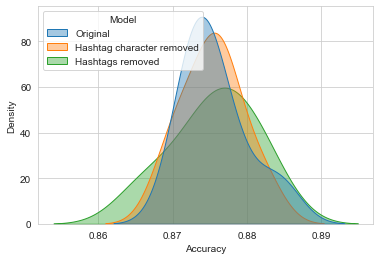

In [6]:
# to save space in the report, put all density graphs onto each other
# This already hints at no significant difference.

ax = sns.kdeplot(data=df_all, x="Accuracy", hue="Model", fill=True, common_norm=False, alpha=0.4)
sns.move_legend(ax, "upper left")
plt.show()

[Text(0.5, 1.0, 'Mean accuracy score')]

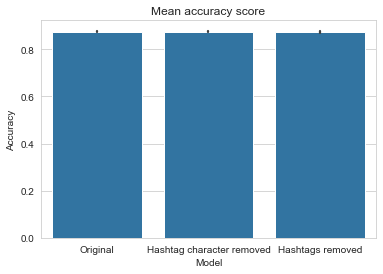

In [7]:
sns.barplot(x="Model", y="Accuracy", data=df_all).set(title='Mean accuracy score')

Having run the three models with the same seeds, we cannot do an ANOVA test on the models (true independency can not be established, although the inputs were essentially different).

Hence, perform two paired samples t-test (paired because the train-test-splits were identical).

We are interested in the comparison of both modified datasets with the original (not with each other), meaning the hypotheses are:

1.
Null: The mean accuracy of the original and hashtag character removed from the input set are equal
Alternative: The mean accuracy on the input set with the hashtag character removed is less than the mean accuracy of the original input

2.
Null: The mean accuracy of the original and hashtags completely removed from the input set are equal
Alternative: The mean accuracy on the input set with the hashtags completely removed is less than the mean accuracy of the original input

As it turns out, we cannot reject both null-hypotheses and conclude that the mean accuracy of the dataset with the hashtag character removed is not less than the mean accuracy from the original input, and the mean accuracy of the dataset with the hashtags completely removed is not less than the mean accuracy from the original input.

In [18]:
from scipy.stats import ttest_rel, ttest_ind
#t_statistic, p_value = ttest_1samp(a=asymmetric_sample['mean_delay_seconds'], popmean=pop_mean, alternative='less')

ttest_rel(df["Accuracy"], df_del_hashtag["Accuracy"], alternative='greater')

TtestResult(statistic=0.18761539506929206, pvalue=0.4286810465530808, df=6)

In [9]:
ttest_rel(df["Accuracy"], df_hashtags_removed["Accuracy"], alternative='greater')

TtestResult(statistic=0.07073831567222541, pvalue=0.47295244110789936, df=6)

In fact, the mean accuracies do not differ, as the two-sided t-tests show:

In [10]:
ttest_rel(df["Accuracy"], df_del_hashtag["Accuracy"])

TtestResult(statistic=0.18761539506929206, pvalue=0.8573620931061616, df=6)

In [11]:
ttest_rel(df["Accuracy"], df_hashtags_removed["Accuracy"])

TtestResult(statistic=0.07073831567222541, pvalue=0.9459048822157987, df=6)

In [12]:
# and to ensure there are no weird outcomes, compare the two modified ones as well
ttest_rel(df_del_hashtag["Accuracy"], df_hashtags_removed["Accuracy"])

TtestResult(statistic=-0.08708722321537819, pvalue=0.9334358707905589, df=6)

In [13]:
# load the result sets
df_lstm = pd.read_csv("./results/result.csv")
df_del_hashtag_lstm = pd.read_csv("./results/result_del_hashtag.csv")
df_hashtags_removed_lstm = pd.read_csv("./results/result_hashtags_removed.csv")

In [14]:
from scipy.stats import f_oneway

Having run both methods with totally different seeds, we can now do an ANOVA test on the models, using the following hypotheses:
Null: the mean accuracy of LSTM and BERT is the same (in all three cases);
Alternative: The LSTM method has a higher mean accuracy than the BERT method (in all three cases).

As it turns out, we can reject the null-hypothesis in all three cases and conclude that the mean accuracy of the LSTM method is greater than the mean accuracy of the BERT method.

In [24]:
f_oneway(df_lstm['Accuracy'], df['Accuracy'])

F_onewayResult(statistic=2883.9600756516925, pvalue=1.04001229432726e-36)

In [25]:
f_oneway(df_del_hashtag_lstm['Accuracy'], df_del_hashtag['Accuracy'])

F_onewayResult(statistic=4816.262093728694, pvalue=8.641498261254504e-41)

In [26]:
f_oneway(df_hashtags_removed_lstm['Accuracy'], df_hashtags_removed['Accuracy'])

F_onewayResult(statistic=4012.4493783743733, pvalue=2.4643482496809086e-39)

or use independent t-tests

In [27]:
ttest_ind(df_lstm["Accuracy"], df["Accuracy"], alternative='greater')

Ttest_indResult(statistic=53.70251461199614, pvalue=5.200061471637389e-37)

In [28]:
ttest_ind(df_del_hashtag_lstm["Accuracy"], df_del_hashtag["Accuracy"], alternative='greater')

Ttest_indResult(statistic=69.3992946198212, pvalue=4.320749130626385e-41)

In [29]:
ttest_ind(df_hashtags_removed_lstm["Accuracy"], df_hashtags_removed["Accuracy"], alternative='greater')

Ttest_indResult(statistic=63.34389772009924, pvalue=1.2321741248403298e-39)